In [55]:
import pandas as pd
from IPython.display import display, Math

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np
import scipy.sparse as sp

from nltk.text import TextCollection

In [56]:
from os import listdir
from os.path import isfile, join
from bs4 import BeautifulSoup
import re
regex = re.compile(r"[^\d]", re.IGNORECASE)

onlyfiles = [f for f in listdir('base') if isfile(join('base', f))]
base_texts = []
for file in onlyfiles:
    base_texts.append(BeautifulSoup(open('base/' + file).read(), 'lxml').text)
onlyfiles = [f for f in listdir('test') if isfile(join('test', f))]



In [65]:
import re
regex = re.compile(r"[^\d]", re.IGNORECASE)
test_texts = {}
for file in onlyfiles:
    id = regex.sub(file, '')
    test_texts[re.sub(regex, '', file)] = BeautifulSoup(open('test/' + file).read(), 'lxml').text

In [100]:
t = []
for i in xrange(len(test_texts.keys())):
    t.append(test_texts[str(i + 1)])
test_texts = t


In [93]:
print t[2049]

Работа в крупнейшей розничной сети! ул. Комсомольская Обязанности:  Выкладка товар. Контроль сроков годности Расстановка ценников Работа за кассой.  Требования:  Исполнительность, умение работать в команде, высокая работоспособность, ответственность. Приветствуется стремление к обучению, развитию и освоению новых технологий.  Условия:  График работы 2/2 Официальная белая заработная плата, возможности карьерного роста, бесплатные и льготные путевки, свой пенсионный фонд. Корпоративное обучение, конкурсы профессионального мастерства. 


In [83]:
print test_texts['2049']

Чем придется заниматься: Интаро — лидер в разработке решений для e-commerce и госсектора. На данный момент мы работаем с такими клиентами, как Связной, re:Store, Sony, AVON, Государственная Дума и др. Проекты в Интаро отличаются своей технологичностью, уникальностью и высокими нагрузками. Помимо уверенных навыков программирования сотрудники Интаро владеют кунг-фу:  Анализа требований и проектирования как типовых, так и нетиповых веб-проектов Владения современными технологиями (nginx, php-fpm, postgresql/mysql, git, memcached, sphinx, kvm) и выбора технологий для решения поставленных задач Выявления узких мест в проектах и их оптимизации Подготовки проекта к посещаемости 100-500 тысяч пользователей в сутки  Если вы не владеете чем-то из вышеперечисленного, у нас вы сможете научиться этому.   Условия работы:  Профессиональный рост Оплата обучения за счет компании Хорошая заработная плата с регулярным повышением Премии Оплачиваемые отпуска Оформление по ТК Сильный коллектив  Требования к 

In [77]:
xrange(0, len(test_texts.keys()))

xrange(3960)

In [68]:
base_text = ["\n".join(base_texts)]
len(base_text[0])

34755

In [6]:
matrix_count.shape

(3961, 182470)

In [7]:
pd.DataFrame(matrix_count).head()

,0,1,2,3,4,5,6,7,8,9,...,182460,182461,182462,182463,182464,182465,182466,182467,182468,182469
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
words = [i[0] for i in sorted(count_vec.vocabulary_.items(), key=lambda x: x[1])]

In [9]:
pd.DataFrame(matrix_count, columns=words).head()

,00,00 00,00 09,00 10,00 11,00 12,00 13,00 15,00 16,00 17,...,іншим,іншим hardware,інші,інші адміністрування,ініціативний,ініціативний маєш,існуючих,існуючих php,іт,іт спеціалістом
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def cos_m(x, y):
    return abs(cosine_similarity(x.reshape(1, -1), y.reshape(1, -1))[0][0])
cos_m(matrix_count[0], matrix_count[1])

In [12]:
y = []
for i in matrix_count[1:]:
    y.append(cos_m(matrix_count[0].reshape(1, -1), i))

In [13]:
len(y)

3960

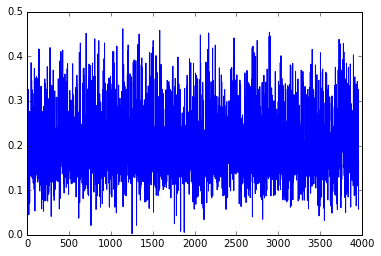

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(y)

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()
matrix_tfidf = tfidf_vec.fit_transform(base_text + test_texts).toarray()

In [16]:
pd.DataFrame(matrix_tfidf).head()

,0,1,2,3,4,5,6,7,8,9,...,27909,27910,27911,27912,27913,27914,27915,27916,27917,27918
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


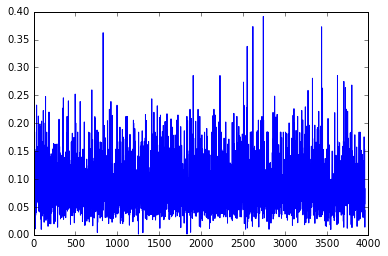

In [17]:
y = []
for i in matrix_tfidf[1:]:
    y.append( cos_m(matrix_tfidf[0], i) )
plt.plot(y)

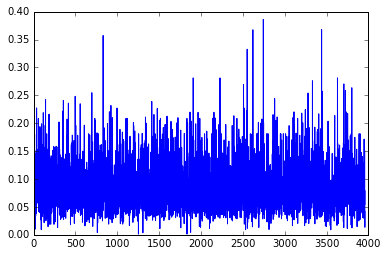

In [18]:
tfidf_vec = TfidfVectorizer(norm=None, smooth_idf=False)
matrix_tfidf = tfidf_vec.fit_transform(base_text + test_texts).toarray()

y = []
for i in matrix_tfidf[1:]:
    y.append( cos_m(matrix_tfidf[0], i) )
plt.plot(y)

In [19]:
stop_words = ["еще", "него", "сказать", "а", "ж", "нее", "со", "без", "же", "ней", "совсем", "более", "жизнь", "нельзя", "так", "больше", "за", "нет", "такой", "будет", "зачем", "ни", "там", "будто", "здесь", "нибудь", "тебя", "бы", "и", "никогда", "тем", "был", "из", "ним", "теперь", "была", "из", "за", "них", "то", "были", "или", "ничего", "тогда", "было", "им", "но", "того", "быть", "иногда", "ну", "тоже", "в", "их", "о", "только", "вам", "к", "об", "том", "вас", "кажется", "один", "тот", "вдруг", "как", "он", "три", "ведь", "какая", "она", "тут", "во", "какой", "они", "ты", "вот", "когда", "опять", "у", "впрочем", "конечно", "от", "уж", "все", "которого", "перед", "уже", "всегда", "которые", "по", "хорошо", "всего", "кто", "под", "хоть", "всех", "куда", "после", "чего", "всю", "ли", "потом", "человек", "вы", "лучше", "потому", "чем", "г", "между", "почти", "через", "где", "меня", "при", "что", "говорил", "мне", "про", "чтоб", "да", "много", "раз", "чтобы", "даже", "может", "разве", "чуть", "два", "можно", "с", "эти", "для", "мой", "сам", "этого", "до", "моя", "свое", "этой", "другой", "мы", "свою", "этом", "его", "на", "себе", "этот", "ее", "над", "себя", "эту", "ей", "надо", "сегодня", "я", "ему", "наконец", "сейчас", "если", "нас", "сказал", "есть", "не", "сказала"]

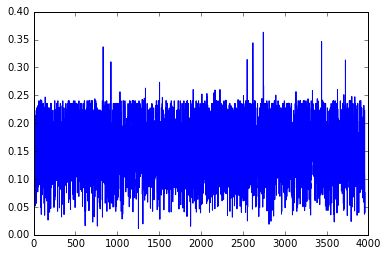

In [20]:
tfidf_vec = TfidfVectorizer(norm=None, smooth_idf=False,\
                            token_pattern=u'[A-Za-zА-Яа-яёЁ]+', stop_words=stop_words)
matrix_tfidf = tfidf_vec.fit_transform(base_text + test_texts).toarray()

y = []
for i in matrix_tfidf[1:]:
    y.append( cos_m(matrix_tfidf[0], i) )
plt.plot(y)

In [21]:
words = [i[0] for i in sorted(tfidf_vec.vocabulary_.items(), key=lambda x: x[1])]

In [22]:
stop_words = ["еще", "него", "сказать", "а", "ж", "нее", "со", "без", "же", "ней", "совсем", "более", "жизнь", "нельзя", "так", "больше", "за", "нет", "такой", "будет", "зачем", "ни", "там", "будто", "здесь", "нибудь", "тебя", "бы", "и", "никогда", "тем", "был", "из", "ним", "теперь", "была", "из", "за", "них", "то", "были", "или", "ничего", "тогда", "было", "им", "но", "того", "быть", "иногда", "ну", "тоже", "в", "их", "о", "только", "вам", "к", "об", "том", "вас", "кажется", "один", "тот", "вдруг", "как", "он", "три", "ведь", "какая", "она", "тут", "во", "какой", "они", "ты", "вот", "когда", "опять", "у", "впрочем", "конечно", "от", "уж", "все", "которого", "перед", "уже", "всегда", "которые", "по", "хорошо", "всего", "кто", "под", "хоть", "всех", "куда", "после", "чего", "всю", "ли", "потом", "человек", "вы", "лучше", "потому", "чем", "г", "между", "почти", "через", "где", "меня", "при", "что", "говорил", "мне", "про", "чтоб", "да", "много", "раз", "чтобы", "даже", "может", "разве", "чуть", "два", "можно", "с", "эти", "для", "мой", "сам", "этого", "до", "моя", "свое", "этой", "другой", "мы", "свою", "этом", "его", "на", "себе", "этот", "ее", "над", "себя", "эту", "ей", "надо", "сегодня", "я", "ему", "наконец", "сейчас", "если", "нас", "сказал", "есть", "не", "сказала"]
stop_words = stop_words + words[:50]

In [28]:
stop_words = ["еще", "него", "сказать", "а", "ж", "нее", "со", "без", "же", "ней", "совсем", "более", "жизнь", "нельзя", "так", "больше", "за", "нет", "такой", "будет", "зачем", "ни", "там", "будто", "здесь", "нибудь", "тебя", "бы", "и", "никогда", "тем", "был", "из", "ним", "теперь", "была", "из", "за", "них", "то", "были", "или", "ничего", "тогда", "было", "им", "но", "того", "быть", "иногда", "ну", "тоже", "в", "их", "о", "только", "вам", "к", "об", "том", "вас", "кажется", "один", "тот", "вдруг", "как", "он", "три", "ведь", "какая", "она", "тут", "во", "какой", "они", "ты", "вот", "когда", "опять", "у", "впрочем", "конечно", "от", "уж", "все", "которого", "перед", "уже", "всегда", "которые", "по", "хорошо", "всего", "кто", "под", "хоть", "всех", "куда", "после", "чего", "всю", "ли", "потом", "человек", "вы", "лучше", "потому", "чем", "г", "между", "почти", "через", "где", "меня", "при", "что", "говорил", "мне", "про", "чтоб", "да", "много", "раз", "чтобы", "даже", "может", "разве", "чуть", "два", "можно", "с", "эти", "для", "мой", "сам", "этого", "до", "моя", "свое", "этой", "другой", "мы", "свою", "этом", "его", "на", "себе", "этот", "ее", "над", "себя", "эту", "ей", "надо", "сегодня", "я", "ему", "наконец", "сейчас", "если", "нас", "сказал", "есть", "не", "сказала"]


In [40]:
from pymystem3 import Mystem
m = Mystem()
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(u'[A-Za-zА-Яа-яёЁ]+')
def tokenize(text):
    tokens = tokenizer.tokenize(text)
    lemms = []
    for i in tokens:
        if len(i)>2:
            lemms.append(m.lemmatize(i)[0])
    return lemms

In [103]:
from pymystem3 import Mystem
m = Mystem()

import json
stop_words = ["еще", "него", "сказать", "а", "ж", "нее", "со", "без", "же", "ней", "совсем", "более", "жизнь", "нельзя", "так", "больше", "за", "нет", "такой", "будет", "зачем", "ни", "там", "будто", "здесь", "нибудь", "тебя", "бы", "и", "никогда", "тем", "был", "из", "ним", "теперь", "была", "из", "за", "них", "то", "были", "или", "ничего", "тогда", "было", "им", "но", "того", "быть", "иногда", "ну", "тоже", "в", "их", "о", "только", "вам", "к", "об", "том", "вас", "кажется", "один", "тот", "вдруг", "как", "он", "три", "ведь", "какая", "она", "тут", "во", "какой", "они", "ты", "вот", "когда", "опять", "у", "впрочем", "конечно", "от", "уж", "все", "которого", "перед", "уже", "всегда", "которые", "по", "хорошо", "всего", "кто", "под", "хоть", "всех", "куда", "после", "чего", "всю", "ли", "потом", "человек", "вы", "лучше", "потому", "чем", "г", "между", "почти", "через", "где", "меня", "при", "что", "говорил", "мне", "про", "чтоб", "да", "много", "раз", "чтобы", "даже", "может", "разве", "чуть", "два", "можно", "с", "эти", "для", "мой", "сам", "этого", "до", "моя", "свое", "этой", "другой", "мы", "свою", "этом", "его", "на", "себе", "этот", "ее", "над", "себя", "эту", "ей", "надо", "сегодня", "я", "ему", "наконец", "сейчас", "если", "нас", "сказал", "есть", "не", "сказала"]

#count_vec = CountVectorizer() # NGRAMMS!
#matrix_count = count_vec.fit_transform(base_text + test_texts).toarray()

tfidf_vec = TfidfVectorizer(tokenizer=tokenize, stop_words=stop_words, ngram_range=[1,3])
matrix_tfidf = tfidf_vec.fit_transform(base_text + test_texts).toarray()

y = []
for i in matrix_tfidf[1:]:
    y.append( cos_m(matrix_tfidf[0], i) )
#plt.plot(y)

In [106]:
print test_texts[2049 - 1]

Чем придется заниматься: Интаро — лидер в разработке решений для e-commerce и госсектора. На данный момент мы работаем с такими клиентами, как Связной, re:Store, Sony, AVON, Государственная Дума и др. Проекты в Интаро отличаются своей технологичностью, уникальностью и высокими нагрузками. Помимо уверенных навыков программирования сотрудники Интаро владеют кунг-фу:  Анализа требований и проектирования как типовых, так и нетиповых веб-проектов Владения современными технологиями (nginx, php-fpm, postgresql/mysql, git, memcached, sphinx, kvm) и выбора технологий для решения поставленных задач Выявления узких мест в проектах и их оптимизации Подготовки проекта к посещаемости 100-500 тысяч пользователей в сутки  Если вы не владеете чем-то из вышеперечисленного, у нас вы сможете научиться этому.   Условия работы:  Профессиональный рост Оплата обучения за счет компании Хорошая заработная плата с регулярным повышением Премии Оплачиваемые отпуска Оформление по ТК Сильный коллектив  Требования к 

In [107]:
parsing_ids = [2049, 52, 4, 5, 3078, 2462, 2570, 13, 2062, 2575, 3090, 22, 535, 1560, 1561, 3610, 2076, 3102, 31, 2081, 1571, 3626, 1580, 46, 1072, 2463, 1076, 3125, 55, 569, 571, 572, 2624, 2828, 69, 586, 1099, 3154, 3667, 2646, 413, 1117, 1911, 2144, 1639, 3178, 2668, 109, 2159, 1136, 1139, 496, 2166, 1146, 636, 2173, 2411, 1154, 3715, 1559, 2184, 3213, 1680, 3730, 2195, 1685, 1647, 1695, 672, 1697, 3235, 2588, 3239, 1704, 3244, 1710, 2225, 1714, 1715, 2228, 695, 2744, 1209, 1215, 630, 1825, 3780, 3269, 2758, 3784, 1218, 717, 3279, 3795, 3285, 25, 2682, 3292, 742, 2279, 808, 723, 3827, 245, 383, 2809, 213, 623, 1279, 777, 3852, 3854, 2323, 1816, 999, 2332, 799, 2438, 2337, 3362, 2339, 1831, 3368, 2696, 814, 2100, 2358, 3901, 1343, 833, 3906, 2884, 3398, 840, 1355, 1360, 3409, 1081, 399, 1367, 859, 861, 998, 3426, 2918, 1384, 2922, 1387, 364, 3438, 2930, 2423, 1407, 1920, 897, 386, 2950, 1419, 1423, 2030, 1937, 3731, 2544, 1437, 414, 1439, 2977, 2467, 1956, 421, 1958, 1961, 2461, 1963, 429, 3800, 2992, 3508, 950, 3001, 3744, 445, 2635, 2215, 3013, 503, 3022, 464, 3545, 1500, 484, 486, 2023, 1107, 1519, 3056, 3570, 1015, 3067, 1024]
med = sum(y)/len(y)
defined = []
other = []
for id in parsing_ids:
    if y[id-1] > med:
        defined.append(id)
    else:
        other.append(id)

data = {'defined': defined, 'other': other}
open('lab4.json', 'w').write(json.dumps(data))

In [31]:
y[:5]

[0.070895858285148397,
 0.11603277852038897,
 0.15076532243839638,
 0.20332488358226666,
 0.15284575668980452]